In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Solana price prediction model with LSTM/Solana Historical Data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1535 non-null   object 
 1   Price     1535 non-null   float64
 2   Open      1535 non-null   float64
 3   High      1535 non-null   float64
 4   Low       1535 non-null   float64
 5   Vol.      1137 non-null   object 
 6   Change %  1535 non-null   object 
dtypes: float64(4), object(3)
memory usage: 84.1+ KB


In [5]:
df.head(50)

,Date,Price,Open,High,Low,Vol.,Change %
0,01/10/2024,145.261,152.621,157.290,142.708,7.03M,-4.83%
1,30/09/2024,152.630,158.471,159.710,151.908,4.23M,-3.69%
2,29/09/2024,158.479,156.710,161.705,155.150,3.29M,1.13%
3,28/09/2024,156.710,157.647,159.396,155.152,2.36M,-0.59%
4,27/09/2024,157.647,155.549,160.986,154.017,4.99M,1.35%
5,26/09/2024,155.548,147.999,157.981,146.590,5.59M,5.10%
6,25/09/2024,147.999,152.666,153.758,147.366,3.81M,-3.07%
7,24/09/2024,152.684,144.714,153.921,143.291,5.54M,5.51%
8,23/09/2024,144.713,144.687,148.985,142.203,4.47M,-0.01%
9,22/09/2024,144.732,149.419,149.870,141.285,3.05M,-3.13%


In [6]:
# Feature engineering
## Remove columns that are not needed
df.drop(['Open','High','Low','Vol.', 'Change %'], axis=1, inplace=True)

In [7]:
# Convert date column from object to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y') # Specify the correct format

# Arrange the dataset into ascending order by date
df.sort_values(by='Date', ascending=True, inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

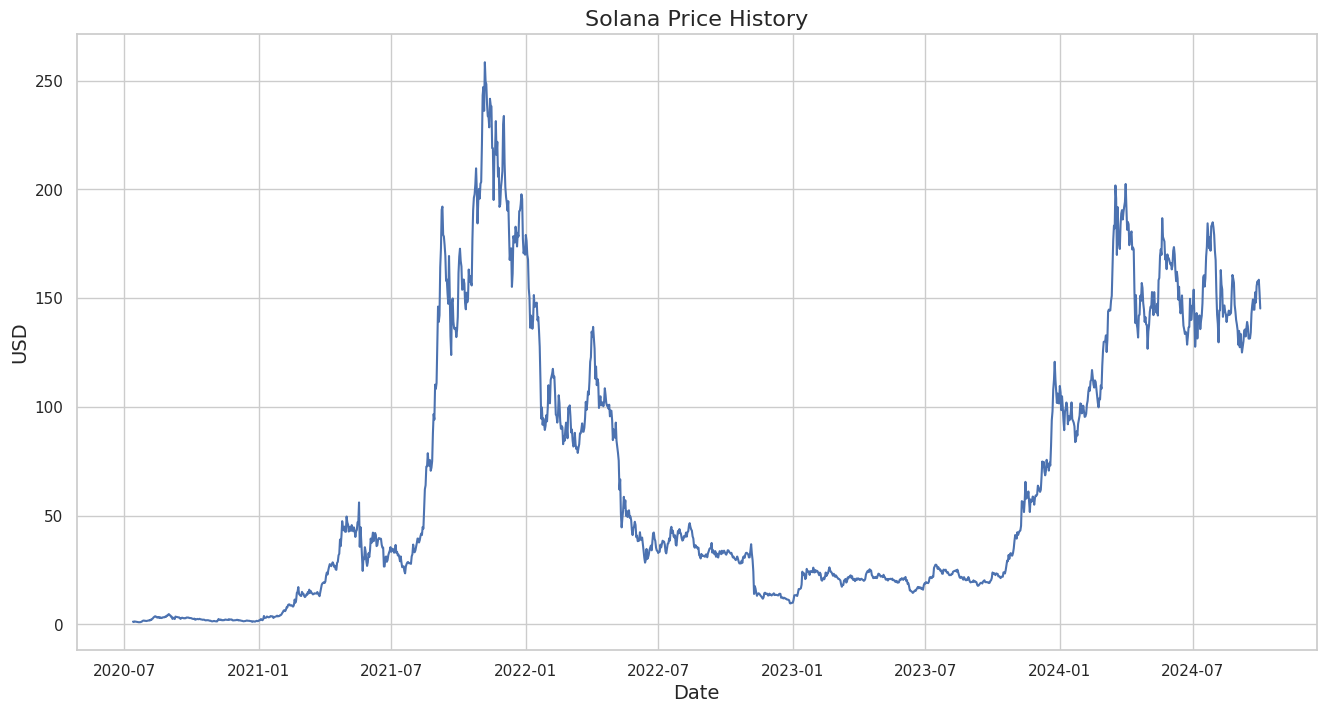

In [8]:
# Visualize the price history

sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.lineplot(x="Date", y="Price", data=df)
plt.title("Solana Price History", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("USD", fontsize=14)


plt.show()

In [9]:
# Train and test data

# Dataframe with only the Price column
price = df.filter(["Price"])

# Convert the dataframe to a np array
import numpy as np
price_array = price.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(price_array)

# Set the train data length

'''
We are splitting the data into 80% for training and the rest for testing.
However, since there is no target variable (y), the standard train_test_split method cannot be applied in this case.
'''
import math
train_price_length = math.ceil(len(price_array) * 0.8)
train_price_length

1228

In [10]:
# Creating the training set
train_data = scaled_data[0 : train_price_length, :]
# Tabulations ofr X_train and y_train

X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data[i - 60 : i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(X_train)
        print(y_train)

[array([0.00106807, 0.00043111, 0.001472  , 0.        , 0.00016312,
       0.00015536, 0.00104865, 0.00235364, 0.0028236 , 0.0030411 ,
       0.002509  , 0.00258668, 0.00214003, 0.00238083, 0.00276534,
       0.00303721, 0.00346444, 0.00302944, 0.0045597 , 0.00406645,
       0.00581032, 0.0066104 , 0.00846691, 0.00948061, 0.01057975,
       0.01057975, 0.0092165 , 0.00844749, 0.00922038, 0.00822222,
       0.00922038, 0.007527  , 0.00846691, 0.00751924, 0.0079853 ,
       0.00896405, 0.00895628, 0.0087815 , 0.00993891, 0.00946895,
       0.01166724, 0.01155461, 0.0133412 , 0.01458017, 0.01290621,
       0.01222264, 0.0097952 , 0.00986511, 0.00595791, 0.00801637,
       0.00744544, 0.0057171 , 0.01013699, 0.00954275, 0.00941458,
       0.00905726, 0.00870383, 0.00880869, 0.00746486, 0.00600451])]
[0.007340575516656117]


In [11]:
#  Transform X_train and y_train np array
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1168, 60, 1)

In [13]:
# Create the testing dataset by selecting data from 60 timesteps before the start of the validation set
test_data = scaled_data[train_price_length - 60 : , :]
# Create X_test and y_test
X_test = []
y_test = df.iloc[train_price_length : , :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i - 60 : i, 0])

In [14]:
# Reshape X_test to a 3-dimensional array
X_test = np.array(X_test)  # Convert the list to a NumPy array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Reshape to (samples, timesteps, features)

In [15]:
# Building the LSTM model

model = Sequential()

model.add(LSTM(units=512, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], 1)))

model.add(LSTM(units=256, activation='relu', return_sequences=False))

model.add(Dense(units=1))



In [16]:
# Compile the LSTM model with the Adam optimizer
# Use mean squared error (MSE) as the loss function to measure prediction error
# Include mean absolute error (MAE) as a performance metric for model evaluation
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=['mae'])

In [17]:
# Train the LSTM model
model.fit(X_train, y_train,
          epochs=35,
          batch_size=32,
          verbose=1)

Epoch 1/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - loss: 0.0203 - mae: 0.0861
Epoch 2/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - loss: 0.0020 - mae: 0.0268
Epoch 3/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - loss: 0.0015 - mae: 0.0232
Epoch 4/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 0.0014 - mae: 0.0229
Epoch 5/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - loss: 0.0019 - mae: 0.0270
Epoch 6/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - loss: 0.0011 - mae: 0.0191
Epoch 7/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - loss: 0.0011 - mae: 0.0199
Epoch 8/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - loss: 8.3821e-04 - mae: 0.0166
Epoch 9/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - loss: 0.0011 - mae: 0.0203
Epoch 10/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - loss: 0.0011 - mae: 0.0205
Epoch 11/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - loss: 8.6765e-04 - mae: 0.0167
Epoch 12/35
37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - loss: 6.7206e-04 - mae: 0.0157
Epoch 13/35
37/37 ━━━━━━━━━━━━━━━━━━━

In [18]:
# Use the trained LSTM model to make predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step


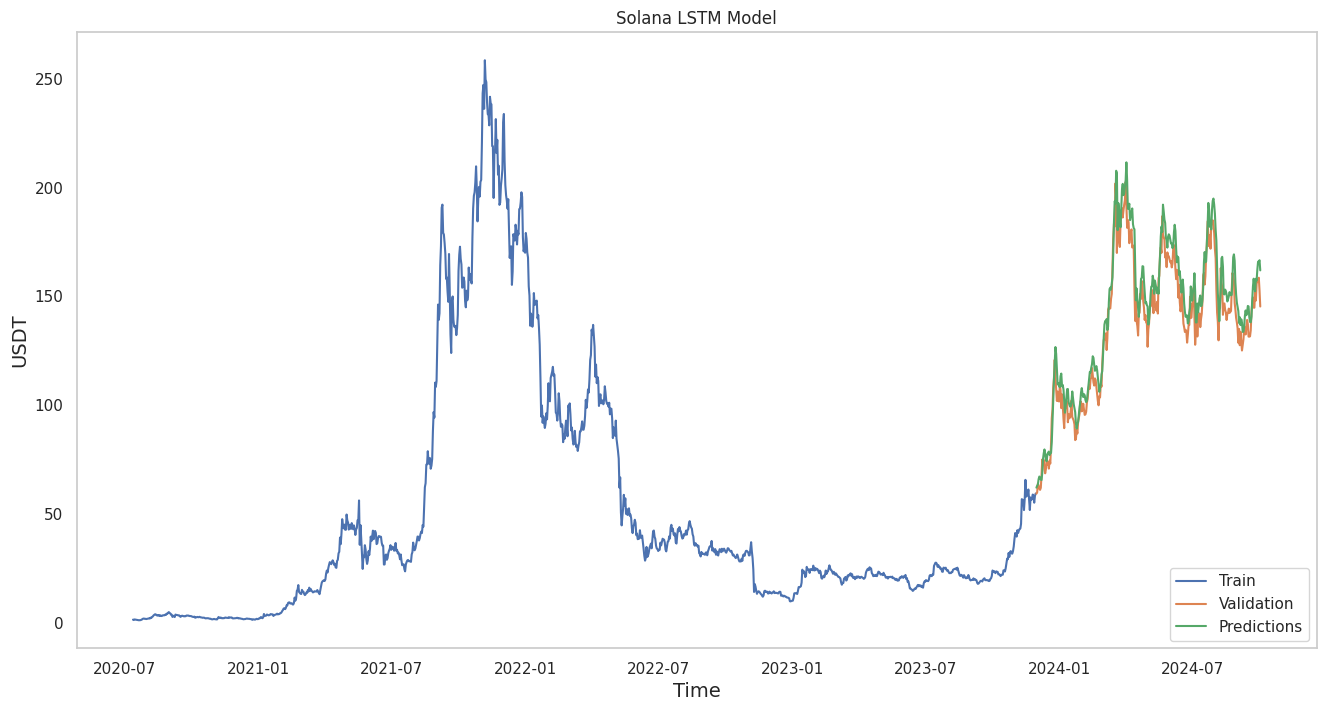

In [19]:
# Visualizing the data

train = price[:train_price_length]
valid = price[train_price_length:]
valid["Predictions"] = predictions
#visualize the data
plt.figure(figsize=(16, 8))
plt.title("Solana LSTM Model")
plt.xlabel("Time", fontsize=14)
plt.ylabel("USDT", fontsize=14)
plt.plot(df["Date"][:train_price_length], train["Price"], label="Train")
plt.plot(df["Date"][train_price_length:], valid["Price"], label="Validation")
plt.plot(df["Date"][train_price_length:], valid["Predictions"], label="Predictions")
plt.legend(["Train", "Validation", "Predictions"], loc="lower right")
plt.grid(False)
plt.show()